Index(['Datum', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit',
       'Wettercode', 'Warengruppe', 'Umsatz', 'KiWo', 'Wochentag',
       'Is_Weekend', 'Temperature_Category', 'Warengruppe_1', 'Warengruppe_2',
       'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6'],
      dtype='object')


/tmp/ipykernel_63016/1190736879.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Wochentag', y='Umsatz', data=wetter_umsatzdaten_kiwo, order=weekday_order, ci=95, capsize=0.1)


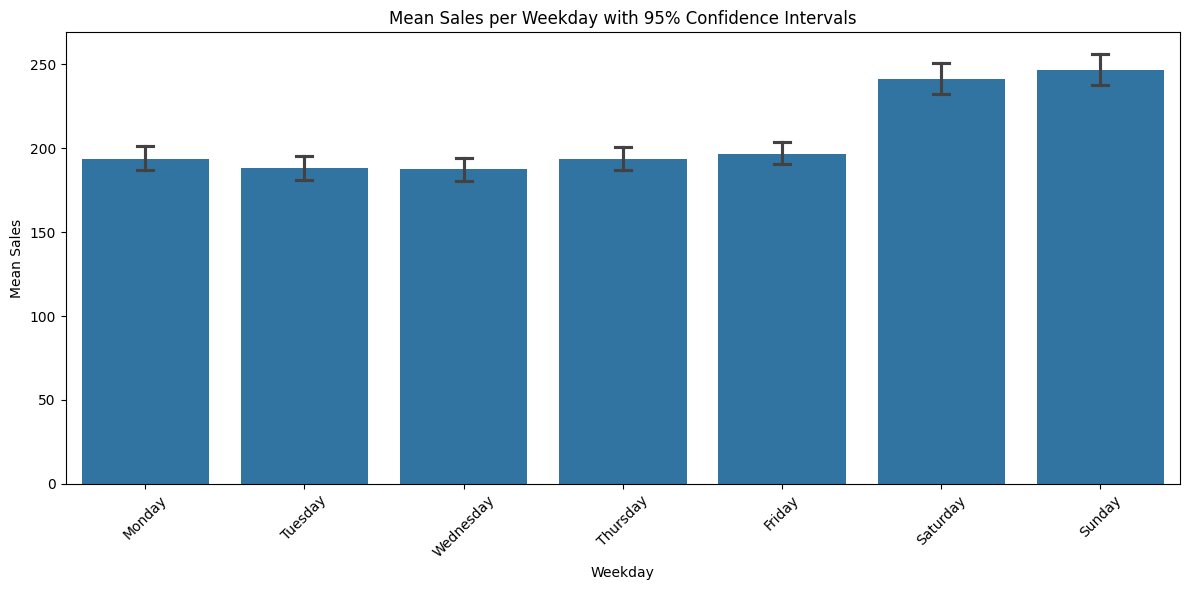

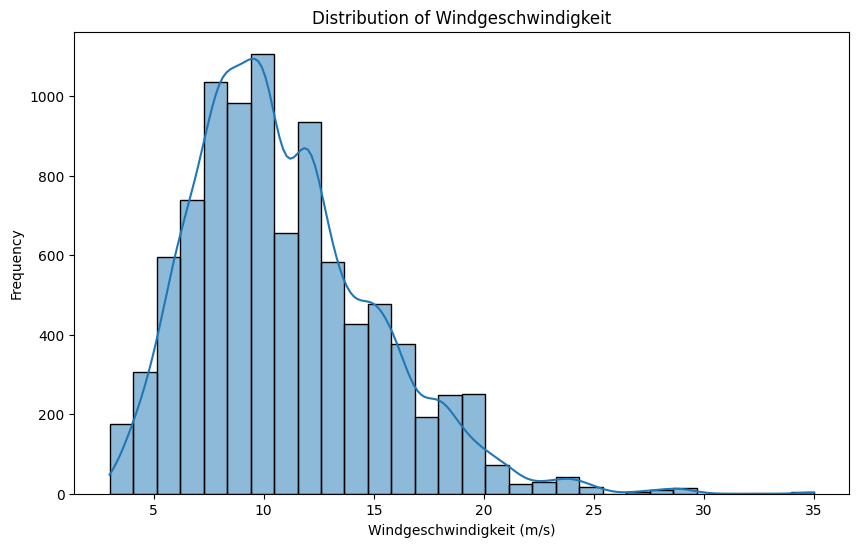

Descriptive Statistics for Windgeschwindigkeit:
count    9318.000000
mean       10.974780
std         4.131974
min         3.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        35.000000
Name: Windgeschwindigkeit, dtype: float64
Data visualization complete.


In [2]:
# DataVis.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset
wetter_umsatzdaten_kiwo = pd.read_csv("../1_DatasetCharacteristics/processed_data.csv")
print(wetter_umsatzdaten_kiwo.columns)
# Step 1: Visualization - Mean sales per weekday
plt.figure(figsize=(12, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='Wochentag', y='Umsatz', data=wetter_umsatzdaten_kiwo, order=weekday_order, ci=95, capsize=0.1)
plt.title('Mean Sales per Weekday with 95% Confidence Intervals')
plt.ylabel('Mean Sales')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Visualization - Distribution of Windgeschwindigkeit
plt.figure(figsize=(10, 6))
sns.histplot(wetter_umsatzdaten_kiwo['Windgeschwindigkeit'], kde=True, bins=30)
plt.title('Distribution of Windgeschwindigkeit')
plt.xlabel('Windgeschwindigkeit (m/s)')
plt.ylabel('Frequency')
plt.show()

# Step 3: Descriptive Statistics
print("Descriptive Statistics for Windgeschwindigkeit:")
print(wetter_umsatzdaten_kiwo['Windgeschwindigkeit'].describe())

print("Data visualization complete.")
